In [1]:
import time
from pyqubo import Array
import numpy as np
import matplotlib.pyplot as plt
#from dwave.system import DWaveSampler, EmbeddingComposite
from dimod.reference.samplers import ExactSolver
from dimod import BinaryQuadraticModel
from dimod import Vartype
#from dwave.system.composites import FixedEmbeddingComposite
import networkx as nx
import dwave_networkx as dnx
import dimod
#from dwave.system.composites import VirtualGraphComposite
#from minorminer import find_embedding
from random import random
from dimod.reference.samplers import SimulatedAnnealingSampler
from numpy import genfromtxt
#from dwave_qbsolv import QBSolv
import neal
import itertools
import random
import array as arr
from matplotlib import pyplot as plt

In [2]:
def modul_by_regularity(G,k):
    a=nx.to_numpy_array(G)

    #a = genfromtxt('a250.csv', delimiter=',') #read adjacency matrix

    #plt.matshow(a) (print a)
    #plt.show()
    n=len(G)
    li=list(range(1,n+1))
    # Create qubo from the graph matrix            

    ra=np.random.randint(2, size=n) #random partitioning of nodes in two classes lis1 and lis2
    lis1=[]
    lis2=[]
    for i in range(n):
        if ra[i]==0:
            lis1.append(i)
        else:
            lis2.append(i)
    #nodes of graph with adjacency matrix are divided uniformly at random in two sets, described
    #by lists list1 and list2
    coss=[] #values of energy per node at each round
    liis1=lis1
    liis2=lis2
    
    
    for je in range(k): #tryes to find communities in 5 rounds
        print("Round"+str(je+1))
        energypernode=[]
        if je>0: #removes found communities in each round
            
            for i in range(len(so1)):
                if so1[i] not in liis1:
                    return 0
                liis1.remove(so1[i])       
            for i in range(len(so2)):
                if so2[i] not in liis2:
                    return 0
                liis2.remove(so2[i])
        lis1=liis1
        lis2=liis2    
        n1=len(lis1)
        n2=len(lis2)
        if n1==0 or n2==0:
            break
        print("verbleibende Knoten:"+str(n1+n2)+str(lis1)+str(lis2))

        b = [[0 for x in range(n2)] for y in range(n1)] 
        for i in range(n1):
            for j in range(n2):
                b[i][j]=a[lis1[i]][lis2[j]]
        #plt.matshow(b)
        #plt.show() #print b-matrix by taking off #'s
        #b is the block of adjacency matrix of bipartite graph with bipartition list1 and list2


        b=(np.asarray(b))
    
        db=np.sum(b)
        db=db/(n1*n2)
        db1=db #db1 is density at the beginning
        ded=[db1]
        emax=5 #emax is number of max iterations at each round
        eni=0  #energy of previous  step
       
        for e in range(emax):        
            
            n1=len(lis1)
            n2=len(lis2)

            b = [[0 for x in range(n2)] for y in range(n1)] 
            for i in range(n1):
                for j in range(n2):
                    b[i][j]=a[lis1[i]][lis2[j]]
            #plt.matshow(b)
            #plt.show() print b-matrix by taking off #'s
            #b is the block of adjacency matrix of bipartite graph with bipartition list1 and list2
            b=(np.asarray(b))
                
            db=np.sum(b)
            db=db/(n1*n2)
            #db is link density of bipartite graph b
            ded.append(db)
           # print("Ded" + str(ded))
            db1=db
            #plt.matshow(b)
           # plt.show()



            M=db-b # qubo kernel
        
            # Create qubo:
            #n1 = b.shape[0]
            #n2 = b.shape[1]
            qubo={}
            nn=n1+n2
            s = ['']*nn
            for i in range(nn):
                s[i]="s_"+str(i)
            
            for i in range(n1):
                for j in range(n2):
                    qubo[(s[i],s[j+n1])]=M[i][j]

            la=lis1+lis2 #la has id's of nodes in a bipartite graph b
            #print(qubo)
            #print(emb)
            #print(la)
            # Create BinaryQuadraticModel
            bqm = BinaryQuadraticModel({}, qubo, 0, Vartype.BINARY)
            #print(bqm)
        
            useSimulatedAnnealing=True

            if useSimulatedAnnealing:
                en=0 #energy of best solution       
                tt=0 #tt is time to best solution
                for gg in range(1):
                    startTime = time.time()
                    #sampler = SimulatedAnnealingSampler()
                    sampler = neal.SimulatedAnnealingSampler()
                    response = sampler.sample(bqm) #response has 10 solutions, energy, values of spin variables
                    #print(response)
                    energ_classic=[]
                    conf_classic=[]
                    endTime = time.time()

                    #print("Simulated annealing, elapsed time: " + str(endTime - startTime))

                    #print("\nResults from simulated annealing sampler:")
                    i = 0
                    ss=0

                    for datum in response.data(['sample', 'energy']):
                        energ_classic.append(datum.energy) #list of energy values    
                        if en>datum.energy:
                            en=datum.energy
                            ss=i
                        con=[]
                        for h in range(nn):
                            con.append(datum.sample[s[h]])

                        #print(datum.sample, datum.energy)
                        conf_classic.append(con)
                    
                        d2=np.array(conf_classic[ss])

                        if(i >= 10):
                            break
                        i += 1    
            lis11=[]
        
            for i in range(n1):
                 if(d2[i]==1):#if the spin has value 1, corresponding node is added
                    lis11.append(la[i])
            lis22=[]
            for i in range(n1,n1+n2):
                if(d2[i]==1):
                    lis22.append(la[i])
            lis1=lis11
            lis2=lis22                
            n1=len(lis1)
            n2=len(lis2)
            if n1==0 or n2==0:
                break
            ep=en/(n1*n2)          
            
            if eni>ep:
                eni=ep
                solu=lis1+lis2
                so1=np.array(lis1)
                so2=np.array(lis2)
            if ep>eni: #stopping criteria in each round
                coss.append(eni)
                break
          
            energypernode.append(en/n1/n2)
            print(energypernode)
        
            print(solu) # solu is list of nodes in current community 
           
        
    print(coss)

In [3]:
G = nx.karate_club_graph()

#A=nx.to_numpy_array(G)
#plt.matshow(A)
#plt.show()
print("Anzahlt der Knoten:"+str(len(G)))
modul_by_regularity(G,k)



Anzahlt der Knoten:34
Round1
verbleibende Knoten:34[1, 3, 6, 7, 9, 10, 11, 13, 15, 16, 19, 20, 21, 27, 29, 30, 31, 32, 33][0, 2, 4, 5, 8, 12, 14, 17, 18, 22, 23, 24, 25, 26, 28]
[-0.13652312599681019]
[1, 3, 6, 7, 10, 13, 27, 31, 32, 33, 0, 2, 4, 5, 8, 14, 18, 22, 23, 24, 28]
[-0.13652312599681019, -0.3340909090909086]
[27, 32, 33, 2, 8, 14, 18, 22, 23, 24, 28]
[-0.13652312599681019, -0.3340909090909086, -0.375]
[32, 33, 8, 14, 18, 22, 23]
Round2
verbleibende Knoten:27[1, 3, 6, 7, 9, 10, 11, 13, 15, 16, 19, 20, 21, 27, 29, 30, 31][0, 2, 4, 5, 12, 17, 24, 25, 26, 28]
[-0.322473604826546]
[1, 3, 6, 7, 9, 10, 11, 13, 16, 19, 21, 27, 31, 0, 2, 5]
[-0.322473604826546, -0.5128205128205124]
[1, 3, 6, 7, 10, 11, 13, 19, 21, 31, 0]
Round3
verbleibende Knoten:16[9, 15, 16, 20, 27, 29, 30][2, 4, 5, 12, 17, 24, 25, 26, 28]
[-0.2331349206349207]
[9, 16, 27, 29, 2, 5, 24, 26]
[-0.2331349206349207, -0.4375]
[9, 27, 2, 24]
Round4
verbleibende Knoten:12[15, 16, 20, 29, 30][4, 5, 12, 17, 25, 26, 28]
[-0

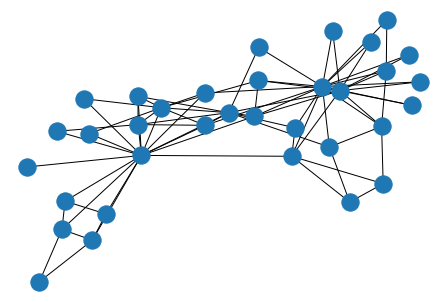

In [234]:
nx.draw(G)